In [10]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: openpyxl in c:\users\soere\appdata\local\programs\python\python310\lib\site-packages (3.1.2)




[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
#libraries
import re
import pandas as pd
import numpy as np
from scipy.stats import chisquare
import seaborn as sns
import matplotlib.pyplot as plt

# Helper Function

In [12]:
def get_mapped_values(input_keys, mappings, value_descriptions):
    # Convert input_keys to strings
    input_keys = [str(key) for key in input_keys]
    
    # Create a set to keep track of unique corresponding values
    unique_values = set()
    
    for key in input_keys:
        # Check if the key is in the first dictionary
        if key in mappings:
            # Get the value from the first dictionary
            intermediate_value = mappings[key]
            
            # Get the corresponding value from the second dictionary
            final_value = value_descriptions.get(intermediate_value, "Value not found in second dictionary")
            
            # Add to set of unique values
            unique_values.add(final_value)
            
            print(f"Key: {key}, Intermediate Value: {intermediate_value}, Final Value: {final_value}")
        else:
            print(f"Key: {key} not found in first dictionary.")
            
    # Check if all corresponding values are the same or different
    if len(unique_values) > 1:
        print("The corresponding values are different.")
    else:
        print("All corresponding values are the same.")

# HISCLASS Dictionary

In [13]:
# Read the .do file
with open(r"C:\Users\soere\OneDrive\Desktop\Matserarbeit\Python\HISCLASS.do") as file:
    lines = file.readlines()

# Display the first 5 lines
lines[:200]

['\n',
 'recode hisco \t(99997=1) (99998=1) (01110=2) (01120=2) (01130=2) (01140=2) (01150=2) (01190=2) (01210=2) (01220=2) (01230=2) (01240=2) ///\n',
 '\t\t\t\t(01250=2) (01260=2) (01270=2) (01280=2) (01290=2) (01320=2) (01330=2) (01340=2) (01350=2) (01390=2) (01400=4) (01420=4) ///\n',
 '\t\t\t\t(01430=4) (01490=4) (02000=2) (02120=2) (02130=2) (02140=2) (02210=2) (02220=2) (02230=2) (02235=2) (02240=2) (02245=2) ///\n',
 '\t\t\t\t(02250=2) (02255=2) (02260=4) (02290=2) (02305=2) (02310=2) (02320=2) (02330=2) (02340=2) (02390=2) (02410=2) (02420=2) ///\n',
 '\t\t\t\t(02430=2) (02440=2) (02450=2) (02460=2) (02470=2) (02480=2) (02485=2) (02490=2) (02510=2) (02520=2) (02590=2) (02620=2) ///\n',
 '\t\t\t\t(02630=2) (02690=2) (02710=2) (02720=2) (02730=2) (02740=2) (02790=2) (02810=2) (02820=2) (02830=2) (02890=2) (02920=2) ///\n',
 '\t\t\t\t(02930=2) (02940=2) (02950=2) (02990=2) (03010=4) (03020=4) (03030=4) (03040=4) (03050=2) (03090=4) (03110=4) (03120=4) ///\n',
 '\t\t\t\t(03130=4) 

In [14]:
# Make a dictionary

# Regular expression to capture HISCO code and its class
pattern = r"\((\d{5})=(\d+)\)"

# Extract all the mappings from the lines
mappings = {}
for line in lines:
    matches = re.findall(pattern, line)
    for hisco_code, hisco_class in matches:
        mappings[hisco_code] = int(hisco_class)

# Check the first few mappings to ensure correctness
dict(list(mappings.items())[:100])

{'99997': 1,
 '99998': 1,
 '01110': 2,
 '01120': 2,
 '01130': 2,
 '01140': 2,
 '01150': 2,
 '01190': 2,
 '01210': 2,
 '01220': 2,
 '01230': 2,
 '01240': 2,
 '01250': 2,
 '01260': 2,
 '01270': 2,
 '01280': 2,
 '01290': 2,
 '01320': 2,
 '01330': 2,
 '01340': 2,
 '01350': 2,
 '01390': 2,
 '01400': 4,
 '01420': 4,
 '01430': 4,
 '01490': 4,
 '02000': 2,
 '02120': 2,
 '02130': 2,
 '02140': 2,
 '02210': 2,
 '02220': 2,
 '02230': 2,
 '02235': 2,
 '02240': 2,
 '02245': 2,
 '02250': 2,
 '02255': 2,
 '02260': 4,
 '02290': 2,
 '02305': 2,
 '02310': 2,
 '02320': 2,
 '02330': 2,
 '02340': 2,
 '02390': 2,
 '02410': 2,
 '02420': 2,
 '02430': 2,
 '02440': 2,
 '02450': 2,
 '02460': 2,
 '02470': 2,
 '02480': 2,
 '02485': 2,
 '02490': 2,
 '02510': 2,
 '02520': 2,
 '02590': 2,
 '02620': 2,
 '02630': 2,
 '02690': 2,
 '02710': 2,
 '02720': 2,
 '02730': 2,
 '02740': 2,
 '02790': 2,
 '02810': 2,
 '02820': 2,
 '02830': 2,
 '02890': 2,
 '02920': 2,
 '02930': 2,
 '02940': 2,
 '02950': 2,
 '02990': 2,
 '03010': 4,

In [15]:
# Convert all values in the mappings dictionary to strings
mappings = {key: str(value) for key, value in mappings.items()}

# Match HISCLASS with Classifications

Load the data

In [16]:
# Load the Excel file
df = pd.read_excel(r"C:\Users\soere\OneDrive\Desktop\Matserarbeit\Python\Hauptberufe_M2.xlsx", dtype = str)

# Drop the observations "Ohne Beruf und Berufsangabe"
df = df.loc[df["Letter"] != "F"]

# Display a few rows of the dataset
df.head(300)

,Letter,Letter Description,Roman,Roman Description,Number,Number Description,HISCO Number 1,HISCO Number 2,HISCO Number 3,HISCO Number 4,...,HISCO Number 17,HISCO Number 18,HISCO Number 19,HISCO Number 20,HISCO Number 21,HISCO Number 22,HISCO Number 23,HISCO Number 24,HISCO Number 25,HISCO Number 26
0,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",I,"Landwirtschaft, Gärtnerei und Tierzucht",1,"Landwirtschaft, Zucht landwirtschaftlicher Nut...",61110,61115,62105,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",I,"Landwirtschaft, Gärtnerei und Tierzucht",2,"Kunst- und Handelsgärtnerei, einschließlich de...",61270,62700,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",I,"Landwirtschaft, Gärtnerei und Tierzucht",3,"Tierzucht (Bienen, Seidenraupen, Fische, Singv...",62920,62930,62990,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",II,Forstwirtschaft und Fischerei,4,Forstwirtschaft und Jagd (Zu a sind die Forst-...,63110,63220,63230,63290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",II,Forstwirtschaft und Fischerei,5,Fischerei auf offener See und an den Küsten,64100,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,E,"Militär-, Hof-, bürgerlicher und kirchlicher D...",XXV,"Militär-, Hof-, bürgerlicher und kirchlicher D...",4,"Bildung, Erziehung und Unterricht, Bibliotheke...",a) 13000 (Teacher,19120 (Librarian),b) 39310 (Verwaltungsangestellte),c) 59990 (Other Service Workers Not Elswhere ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,E,"Militär-, Hof-, bürgerlicher und kirchlicher D...",XXV,"Militär-, Hof-, bürgerlicher und kirchlicher D...",5,Gesundheitspflege und Krankendienst: (Ärzte - ...,06100 (Medical Doctors,06210 (Medical Assistant),06510 (Tierarzt),06610 (Veterinary Assistant),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,E,"Militär-, Hof-, bürgerlicher und kirchlicher D...",XXV,"Militär-, Hof-, bürgerlicher und kirchlicher D...",6,"Privatgelehrte, Schriftsteller, Journalisten",15120 (Author),15900 (Author,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,E,"Militär-, Hof-, bürgerlicher und kirchlicher D...",XXV,"Militär-, Hof-, bürgerlicher und kirchlicher D...",7,"Stenographen, Privatsekretäre, Rechnungsführer...",32110 (Stenographer-Typist,32120 (Sekräterin),39320 (Schreiber),33110 (Bookkeeper,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Define a function that removes letters and other signs

In [17]:
# Columns to which we apply the function
HISCO_columns = ["HISCO Number 1",
                 "HISCO Number 2",
                 "HISCO Number 3",
                 "HISCO Number 4",
                 "HISCO Number 5",
                 "HISCO Number 6",
                 "HISCO Number 7",
                 "HISCO Number 8",
                 "HISCO Number 9",
                 "HISCO Number 10",
                 "HISCO Number 11",
                 "HISCO Number 12",
                 "HISCO Number 13",
                 "HISCO Number 14",
                 "HISCO Number 15",
                 "HISCO Number 16",
                 "HISCO Number 17",
                 "HISCO Number 18",
                 "HISCO Number 19",
                 "HISCO Number 20",
                 "HISCO Number 21",
                 "HISCO Number 22",
                 "HISCO Number 23",
                 "HISCO Number 24",
                 "HISCO Number 25",
                 "HISCO Number 26"]

# Define a function to extract all digits from a string
#def extract_digits(val):
    #if isinstance(val, str):
        #return ''.join(re.findall('\d', val)) 
    #return val

def extract_digits(val):
    if isinstance(val, str):
        return ''.join(re.findall("\d", val))
    return str(val) if val is not None else None

# Apply the function to the HISCO columns
for col in HISCO_columns:
    df[col] = df[col].apply(extract_digits)

# Display the first few rows of the cleaned dataset
df.head(300)

,Letter,Letter Description,Roman,Roman Description,Number,Number Description,HISCO Number 1,HISCO Number 2,HISCO Number 3,HISCO Number 4,...,HISCO Number 17,HISCO Number 18,HISCO Number 19,HISCO Number 20,HISCO Number 21,HISCO Number 22,HISCO Number 23,HISCO Number 24,HISCO Number 25,HISCO Number 26
0,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",I,"Landwirtschaft, Gärtnerei und Tierzucht",1,"Landwirtschaft, Zucht landwirtschaftlicher Nut...",61110,61115,62105,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",I,"Landwirtschaft, Gärtnerei und Tierzucht",2,"Kunst- und Handelsgärtnerei, einschließlich de...",61270,62700,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",I,"Landwirtschaft, Gärtnerei und Tierzucht",3,"Tierzucht (Bienen, Seidenraupen, Fische, Singv...",62920,62930,62990,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",II,Forstwirtschaft und Fischerei,4,Forstwirtschaft und Jagd (Zu a sind die Forst-...,63110,63220,63230,63290,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",II,Forstwirtschaft und Fischerei,5,Fischerei auf offener See und an den Küsten,64100,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,E,"Militär-, Hof-, bürgerlicher und kirchlicher D...",XXV,"Militär-, Hof-, bürgerlicher und kirchlicher D...",4,"Bildung, Erziehung und Unterricht, Bibliotheke...",13000,19120,39310,59990,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
205,E,"Militär-, Hof-, bürgerlicher und kirchlicher D...",XXV,"Militär-, Hof-, bürgerlicher und kirchlicher D...",5,Gesundheitspflege und Krankendienst: (Ärzte - ...,06100,06210,06510,06610,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
206,E,"Militär-, Hof-, bürgerlicher und kirchlicher D...",XXV,"Militär-, Hof-, bürgerlicher und kirchlicher D...",6,"Privatgelehrte, Schriftsteller, Journalisten",15120,15900,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
207,E,"Militär-, Hof-, bürgerlicher und kirchlicher D...",XXV,"Militär-, Hof-, bürgerlicher und kirchlicher D...",7,"Stenographen, Privatsekretäre, Rechnungsführer...",32110,32120,39320,33110,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [18]:
# Replace the 'NaN' strings with actual NaN values
df.replace("nan", np.nan, inplace=True)

In [19]:
cell = df.loc[208, "HISCO Number 19"]
cell_type = type(cell)
print(cell_type)
df

<class 'float'>


,Letter,Letter Description,Roman,Roman Description,Number,Number Description,HISCO Number 1,HISCO Number 2,HISCO Number 3,HISCO Number 4,...,HISCO Number 17,HISCO Number 18,HISCO Number 19,HISCO Number 20,HISCO Number 21,HISCO Number 22,HISCO Number 23,HISCO Number 24,HISCO Number 25,HISCO Number 26
0,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",I,"Landwirtschaft, Gärtnerei und Tierzucht",1,"Landwirtschaft, Zucht landwirtschaftlicher Nut...",61110,61115,62105,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",I,"Landwirtschaft, Gärtnerei und Tierzucht",2,"Kunst- und Handelsgärtnerei, einschließlich de...",61270,62700,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",I,"Landwirtschaft, Gärtnerei und Tierzucht",3,"Tierzucht (Bienen, Seidenraupen, Fische, Singv...",62920,62930,62990,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",II,Forstwirtschaft und Fischerei,4,Forstwirtschaft und Jagd (Zu a sind die Forst-...,63110,63220,63230,63290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",II,Forstwirtschaft und Fischerei,5,Fischerei auf offener See und an den Küsten,64100,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,E,"Militär-, Hof-, bürgerlicher und kirchlicher D...",XXV,"Militär-, Hof-, bürgerlicher und kirchlicher D...",4,"Bildung, Erziehung und Unterricht, Bibliotheke...",13000,19120,39310,59990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,E,"Militär-, Hof-, bürgerlicher und kirchlicher D...",XXV,"Militär-, Hof-, bürgerlicher und kirchlicher D...",5,Gesundheitspflege und Krankendienst: (Ärzte - ...,06100,06210,06510,06610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,E,"Militär-, Hof-, bürgerlicher und kirchlicher D...",XXV,"Militär-, Hof-, bürgerlicher und kirchlicher D...",6,"Privatgelehrte, Schriftsteller, Journalisten",15120,15900,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,E,"Militär-, Hof-, bürgerlicher und kirchlicher D...",XXV,"Militär-, Hof-, bürgerlicher und kirchlicher D...",7,"Stenographen, Privatsekretäre, Rechnungsführer...",32110,32120,39320,33110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
def check_cells(df, columns):
        
    # Loop over each column of interest
    for col in columns:
        # For each column, loop over each cell
        for idx, cell in enumerate(df[col]):
            # For each cell, check if its length is 5 or if it's NaN
            if not (len(str(cell)) == 5 or pd.isna(cell)):
                print(f"Invalid cell found at Column: {col}, Row: {idx + 1}, Entry: {cell}")
                return
    print("All cells are valid.")

# Test the function on the provided data
check_cells(df, HISCO_columns)

All cells are valid.


In [21]:
df_HISCLASS = df.copy()
df_HISCLASS[HISCO_columns] = df[HISCO_columns].replace(mappings)
df_HISCLASS[HISCO_columns].astype(str)
df_HISCLASS

,Letter,Letter Description,Roman,Roman Description,Number,Number Description,HISCO Number 1,HISCO Number 2,HISCO Number 3,HISCO Number 4,...,HISCO Number 17,HISCO Number 18,HISCO Number 19,HISCO Number 20,HISCO Number 21,HISCO Number 22,HISCO Number 23,HISCO Number 24,HISCO Number 25,HISCO Number 26
0,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",I,"Landwirtschaft, Gärtnerei und Tierzucht",1,"Landwirtschaft, Zucht landwirtschaftlicher Nut...",8,10,12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",I,"Landwirtschaft, Gärtnerei und Tierzucht",2,"Kunst- und Handelsgärtnerei, einschließlich de...",8,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",I,"Landwirtschaft, Gärtnerei und Tierzucht",3,"Tierzucht (Bienen, Seidenraupen, Fische, Singv...",10,12,12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",II,Forstwirtschaft und Fischerei,4,Forstwirtschaft und Jagd (Zu a sind die Forst-...,10,3,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",II,Forstwirtschaft und Fischerei,5,Fischerei auf offener See und an den Küsten,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,E,"Militär-, Hof-, bürgerlicher und kirchlicher D...",XXV,"Militär-, Hof-, bürgerlicher und kirchlicher D...",4,"Bildung, Erziehung und Unterricht, Bibliotheke...",2,4,5,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,E,"Militär-, Hof-, bürgerlicher und kirchlicher D...",XXV,"Militär-, Hof-, bürgerlicher und kirchlicher D...",5,Gesundheitspflege und Krankendienst: (Ärzte - ...,2,4,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,E,"Militär-, Hof-, bürgerlicher und kirchlicher D...",XXV,"Militär-, Hof-, bürgerlicher und kirchlicher D...",6,"Privatgelehrte, Schriftsteller, Journalisten",2,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,E,"Militär-, Hof-, bürgerlicher und kirchlicher D...",XXV,"Militär-, Hof-, bürgerlicher und kirchlicher D...",7,"Stenographen, Privatsekretäre, Rechnungsführer...",5,5,5,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Create a mapping dictionary for the Skills
skill_mappings = {
    "1": "high",
    "2": "high",
    "3": "medium",
    "4": "medium",
    "5": "low",
    "6": "medium",
    "7": "medium",
    "8": "medium",
    "9": "low",
    "10": "low",
    "11": "unskilled",
    "12": "unskilled"}

# Map the skill level
df_SKILLS = df_HISCLASS.copy()
df_SKILLS[HISCO_columns] = df_HISCLASS[HISCO_columns].replace(skill_mappings)
df_SKILLS

,Letter,Letter Description,Roman,Roman Description,Number,Number Description,HISCO Number 1,HISCO Number 2,HISCO Number 3,HISCO Number 4,...,HISCO Number 17,HISCO Number 18,HISCO Number 19,HISCO Number 20,HISCO Number 21,HISCO Number 22,HISCO Number 23,HISCO Number 24,HISCO Number 25,HISCO Number 26
0,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",I,"Landwirtschaft, Gärtnerei und Tierzucht",1,"Landwirtschaft, Zucht landwirtschaftlicher Nut...",medium,low,unskilled,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",I,"Landwirtschaft, Gärtnerei und Tierzucht",2,"Kunst- und Handelsgärtnerei, einschließlich de...",medium,unskilled,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",I,"Landwirtschaft, Gärtnerei und Tierzucht",3,"Tierzucht (Bienen, Seidenraupen, Fische, Singv...",low,unskilled,unskilled,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",II,Forstwirtschaft und Fischerei,4,Forstwirtschaft und Jagd (Zu a sind die Forst-...,low,medium,unskilled,unskilled,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",II,Forstwirtschaft und Fischerei,5,Fischerei auf offener See und an den Küsten,low,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,E,"Militär-, Hof-, bürgerlicher und kirchlicher D...",XXV,"Militär-, Hof-, bürgerlicher und kirchlicher D...",4,"Bildung, Erziehung und Unterricht, Bibliotheke...",high,medium,low,low,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,E,"Militär-, Hof-, bürgerlicher und kirchlicher D...",XXV,"Militär-, Hof-, bürgerlicher und kirchlicher D...",5,Gesundheitspflege und Krankendienst: (Ärzte - ...,high,medium,high,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,E,"Militär-, Hof-, bürgerlicher und kirchlicher D...",XXV,"Militär-, Hof-, bürgerlicher und kirchlicher D...",6,"Privatgelehrte, Schriftsteller, Journalisten",high,high,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,E,"Militär-, Hof-, bürgerlicher und kirchlicher D...",XXV,"Militär-, Hof-, bürgerlicher und kirchlicher D...",7,"Stenographen, Privatsekretäre, Rechnungsführer...",low,low,low,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
HISCO_try = [33160, 63220]
get_mapped_values(HISCO_try, mappings, skill_mappings)

Key: 33160, Intermediate Value: 5, Final Value: low
Key: 63220, Intermediate Value: 3, Final Value: medium
The corresponding values are different.


# Descriptionary Analysis

## How many per row?

In [14]:
# How many entries does 
df_SKILLS["Number_entries"] = df_SKILLS[HISCO_columns].apply(lambda row: len(row.dropna()), axis=1)
df_SKILLS["Number_entries"]

0       3
1       2
2       3
3       4
4       1
       ..
204     4
205    10
206     2
207     4
208     4
Name: Number_entries, Length: 209, dtype: int64

In [15]:
# Number of unique non-NaN values for each row
df_SKILLS["occurence_HISCO_codes"] = df_SKILLS[HISCO_columns].apply(lambda row: len(row.dropna().unique()), axis=1)


In [16]:
df_SKILLS.columns

Index(['Letter', 'Letter Description', 'Roman', 'Roman Description', 'Number',
       'Number Description', 'HISCO Number 1', 'HISCO Number 2',
       'HISCO Number 3', 'HISCO Number 4', 'HISCO Number 5', 'HISCO Number 6',
       'HISCO Number 7', 'HISCO Number 8', 'HISCO Number 9', 'HISCO Number 10',
       'HISCO Number 11', 'HISCO Number 12', 'HISCO Number 13',
       'HISCO Number 14', 'HISCO Number 15', 'HISCO Number 16',
       'HISCO Number 17', 'HISCO Number 18', 'HISCO Number 19',
       'HISCO Number 20', 'HISCO Number 21', 'HISCO Number 22',
       'HISCO Number 23', 'HISCO Number 24', 'HISCO Number 25',
       'HISCO Number 26', 'Number_entries', 'occurence_HISCO_codes'],
      dtype='object')

In [17]:
counts = df_SKILLS["occurence_HISCO_codes"].value_counts()
print(counts)

occurence_HISCO_codes
1    134
2     56
3     16
4      3
Name: count, dtype: int64


In [18]:
filtered_df = df_SKILLS[df_SKILLS["occurence_HISCO_codes"] == 3]

print(filtered_df)

    Letter                                 Letter Description Roman   
0        A  Landwirtschaft, Gärtnerei und Tierzucht, Forst...     I  \
3        A  Landwirtschaft, Gärtnerei und Tierzucht, Forst...    II   
6        B   Industrie, einschließlich Bergbau und Baugewerbe   III   
7        B   Industrie, einschließlich Bergbau und Baugewerbe   III   
8        B   Industrie, einschließlich Bergbau und Baugewerbe   III   
9        B   Industrie, einschließlich Bergbau und Baugewerbe   III   
60       B   Industrie, einschließlich Bergbau und Baugewerbe    VI   
63       B   Industrie, einschließlich Bergbau und Baugewerbe   VII   
171      B   Industrie, einschließlich Bergbau und Baugewerbe   XIX   
183      C                                 Handel und Verkehr  XXII   
190      C                                 Handel und Verkehr  XXII   
191      C                                 Handel und Verkehr  XXII   
202      E  Militär-, Hof-, bürgerlicher und kirchlicher D...   XXV   
203   

In [19]:
# Do the SKILL levels differ? (True if they differ)
df_SKILLS["differing_realizations"] = df_SKILLS[HISCO_columns].apply(lambda row: len(row.dropna().unique()) > 1, axis=1)
df_SKILLS["differing_realizations"]

0       True
1       True
2       True
3       True
4      False
       ...  
204     True
205     True
206    False
207     True
208     True
Name: differing_realizations, Length: 209, dtype: bool

In [20]:
# How often do they differ?
differ_count = df_SKILLS["differing_realizations"].value_counts().get(True, 0)
same_count = df_SKILLS["differing_realizations"].value_counts().get(False, 0)

print(f"{differ_count} sectors have different skill levels")
print(f"{same_count} sectors have the same skills levels")

75 sectors have different skill levels
134 sectors have the same skills levels


In [21]:
def get_realization_counts(row):
    # Count non-NaN values
    counts = row.dropna().value_counts().to_dict()
    # Convert counts to string representation
    return ', '.join([f"{key}: {value}" for key, value in counts.items()])

df_SKILLS["realization_counts"] = df_SKILLS[HISCO_columns].apply(get_realization_counts, axis=1)

In [22]:
pd.set_option("display.max_rows", None)
print(df_SKILLS["realization_counts"])

0               medium: 1, low: 1, unskilled: 1
1                       medium: 1, unskilled: 1
2                          unskilled: 2, low: 1
3               unskilled: 2, low: 1, medium: 1
4                                        low: 1
5                                        low: 1
6                    low: 2, high: 1, medium: 1
7                    low: 1, high: 1, medium: 1
8                    low: 2, high: 1, medium: 1
9                    low: 2, high: 1, medium: 1
10                            low: 3, medium: 3
11                                 unskilled: 1
12                            medium: 1, low: 1
13                            low: 1, medium: 1
14                                       low: 1
15                                 unskilled: 1
16                                 unskilled: 1
17                                       low: 1
18                                       low: 1
19                         unskilled: 1, low: 1
20                            low: 3, me

## Crosstable

In [23]:
crosstab_result = pd.crosstab(df_SKILLS["Number_entries"], df_SKILLS["occurence_HISCO_codes"])

crosstab_result

occurence_HISCO_codes,1,2,3,4
Number_entries,,,,
1,103,0,0,0
2,17,24,0,0
3,10,16,3,0
4,2,7,6,0
5,0,4,3,0
6,0,4,1,1
7,1,1,0,0
8,1,0,0,0
10,0,0,1,2


# Zuordnung zu der Landkreis-data

In [24]:
# Load the Landkreis occupation data
#file_path = r"C:\Users\soere\OneDrive\Desktop\Matserarbeit\occupation_1907_ready.dta"
file_path = r"C:\Users\soere\OneDrive\Desktop\Matserarbeit\Python\occupation_detailed.dta"

# Read DTA file and create DataFrame
df_LK = pd.read_stata(file_path)

In [25]:
pd.reset_option("display.max_rows")
df_LK

,id_inequality,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w
0,1.0,A,1,6541.0,5786.0
1,1.0,A,2,38.0,10.0
2,1.0,A,4,69.0,100.0
3,1.0,A,5,397.0,110.0
4,1.0,A,6,187.0,36.0
...,...,...,...,...,...
80884,702.0,E,8,0.0,0.0
80885,702.0,F,1,137.0,214.0
80886,702.0,F,2,2.0,16.0
80887,702.0,F,3,77.0,17.0


In [26]:
# Rename columns for mapping
df_LK = df_LK.rename(columns={
    "i_Grossbuchstabe": "Letter",
    "i_Ziffer": "Number"
})

# Drop the observations "Ohne Beruf und Berufsangabe"
df_LK = df_LK.loc[df_LK["Letter"] != "F"]

In [27]:
# CHange the dtype for the mapping
print(df_LK[["Letter", "Number"]].dtypes)
print(df_SKILLS[["Letter", "Number"]].dtypes)
df_LK["Number"] = df_LK["Number"].astype("str")

Letter    object
Number     int16
dtype: object
Letter    object
Number    object
dtype: object


In [28]:
merged_df = df_LK.merge(df_SKILLS[["Letter", "Number", "occurence_HISCO_codes"]], 
                        on=["Letter", "Number"], 
                        how="left")

In [29]:
merged_df["d_Hauptberuf"] = merged_df["d_Hauptberuf_w"] + merged_df["d_Hauptberuf_m"]

In [30]:
result = (merged_df.groupby("occurence_HISCO_codes")["d_Hauptberuf"].sum().reset_index()).astype(int)
total_sum = result["d_Hauptberuf"].sum()
result["percentage"] = (result["d_Hauptberuf"] / total_sum) * 100
result

,occurence_HISCO_codes,d_Hauptberuf,percentage
0,1,5903574,37.115143
1,2,1882122,11.832701
2,3,7429763,46.710131
3,4,690647,4.342024


In [31]:
merged_df = df_LK.merge(df_SKILLS[["Letter", "Number", "occurence_HISCO_codes"]], 
                        on=["Letter", "Number"], 
                        how="left")

In [32]:
# Check the number of workers in 4 heavy industries
df_ind = merged_df[
    (merged_df["Letter"] == "B") & 
    (merged_df["Number"].isin(["1", "2", "3", "4"]))
]
sum_ind = df_ind["d_Hauptberuf"].sum()
print(sum_ind)


KeyError: 'd_Hauptberuf'

In [ ]:
# Check the number of workers in 2 chemical industries
df_chem = merged_df[
    (merged_df["Letter"] == "B") & 
    (merged_df["Number"].isin(["55", "58"]))
]
sum_chem = df_chem["d_Hauptberuf"].sum()
print(sum_chem)


In [ ]:
# Check the number of workers in 2 sectors of agriculture
df_agri = merged_df[
    (merged_df["Letter"] == "A") & 
    (merged_df["Number"].isin(["1", "4"]))
]
sum_agri = df_agri["d_Hauptberuf"].sum()
print(sum_agri)

# Map the HISCO NUmbers to the Landkreis-data

In [33]:
# Combine 'Letter', 'Number', and the columns from HISCO_columns
selected_columns = ["Letter", "Number"] + HISCO_columns

# Map the HISCLASS levels on the LK data
merged_df = df_LK.merge(df_SKILLS[selected_columns], 
                        on=["Letter", "Number"], 
                        how="left")


In [34]:
pd.set_option("display.max_columns", None)
merged_df.head(10)

,id_inequality,Letter,Number,d_Hauptberuf_m,d_Hauptberuf_w,HISCO Number 1,HISCO Number 2,HISCO Number 3,HISCO Number 4,HISCO Number 5,HISCO Number 6,HISCO Number 7,HISCO Number 8,HISCO Number 9,HISCO Number 10,HISCO Number 11,HISCO Number 12,HISCO Number 13,HISCO Number 14,HISCO Number 15,HISCO Number 16,HISCO Number 17,HISCO Number 18,HISCO Number 19,HISCO Number 20,HISCO Number 21,HISCO Number 22,HISCO Number 23,HISCO Number 24,HISCO Number 25,HISCO Number 26
0,1.0,A,1,6541.0,5786.0,medium,low,unskilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,A,2,38.0,10.0,medium,unskilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,A,4,69.0,100.0,low,medium,unskilled,unskilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,A,5,397.0,110.0,low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,A,6,187.0,36.0,low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,B,1,2.0,0.0,low,high,medium,low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,B,6,3.0,0.0,unskilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.0,B,7,1.0,0.0,medium,low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,B,8,9.0,0.0,low,medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.0,B,9,1.0,0.0,low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Lets find out the district names
unique_values = merged_df['district_name'].unique()

print(unique_values)

KeyError: 'district_name'

# Weitere Zuordnung

In [8]:
HISCO_try = [33160]
get_mapped_values(HISCO_try, mappings, skill_mappings)

NameError: name 'skill_mappings' is not defined

Berufe mal angucken

In [37]:
merged_df['d_Hauptberuf'] = merged_df['d_Hauptberuf_m'] + merged_df['d_Hauptberuf_w']
merged_df

,id_inequality,Letter,Number,d_Hauptberuf_m,d_Hauptberuf_w,HISCO Number 1,HISCO Number 2,HISCO Number 3,HISCO Number 4,HISCO Number 5,HISCO Number 6,HISCO Number 7,HISCO Number 8,HISCO Number 9,HISCO Number 10,HISCO Number 11,HISCO Number 12,HISCO Number 13,HISCO Number 14,HISCO Number 15,HISCO Number 16,HISCO Number 17,HISCO Number 18,HISCO Number 19,HISCO Number 20,HISCO Number 21,HISCO Number 22,HISCO Number 23,HISCO Number 24,HISCO Number 25,HISCO Number 26,d_Hauptberuf
0,1.0,A,1,6541.0,5786.0,medium,low,unskilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12327.0
1,1.0,A,2,38.0,10.0,medium,unskilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0
2,1.0,A,4,69.0,100.0,low,medium,unskilled,unskilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169.0
3,1.0,A,5,397.0,110.0,low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0
4,1.0,A,6,187.0,36.0,low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,223.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76920,702.0,E,2,41.0,3.0,high,medium,low,low,low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0
76921,702.0,E,3,34.0,0.0,low,high,medium,medium,low,medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
76922,702.0,E,4,40.0,8.0,high,medium,low,low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0
76923,702.0,E,5,6.0,16.0,high,medium,high,medium,low,low,medium,medium,medium,medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0


In [38]:
sum_df = merged_df.groupby(['Letter', 'Number']).agg({
    'd_Hauptberuf': 'sum',
    'd_Hauptberuf_m': 'sum',
    'd_Hauptberuf_w': 'sum'
}).reset_index()

In [39]:
sum_df

,Letter,Number,d_Hauptberuf,d_Hauptberuf_m,d_Hauptberuf_w
0,A,1,5676116.0,2987634.0,2688482.0
1,A,2,92529.0,75618.0,16911.0
2,A,3,1701.0,1578.0,123.0
3,A,4,67267.0,59974.0,7293.0
4,A,5,11272.0,10345.0,927.0
...,...,...,...,...,...
204,E,4,176288.0,120388.0,55900.0
205,E,5,123359.0,47718.0,75641.0
206,E,6,5367.0,4806.0,561.0
207,E,7,6593.0,5101.0,1492.0


# Gucken wie viele Leute in den jeweiligen Professions arbeiten für Tabelle in 2.1 AGri II and Industry

In [40]:
# Drop B 
# Condition to filter out the row where column1 is 'A' and column2 is '1'

condition = (sum_df['Letter'] == 'B') & (sum_df['Number'] == '166')

# Drop the row that fulfills the condition

sum_df = sum_df.drop(df[condition].index)

In [41]:
# sum of d_Hauptberuf
all_employed = sum_df["d_Hauptberuf"].sum()
all_employed

15891371.0

In [42]:
sum_df["share"] = sum_df["d_Hauptberuf"]/all_employed

pd.set_option('display.max_rows', 500)
sum_df

,Letter,Number,d_Hauptberuf,d_Hauptberuf_m,d_Hauptberuf_w,share
0,A,1,5676116.0,2987634.0,2688482.0,0.357182
1,A,2,92529.0,75618.0,16911.0,0.005823
2,A,3,1701.0,1578.0,123.0,0.000107
3,A,4,67267.0,59974.0,7293.0,0.004233
4,A,5,11272.0,10345.0,927.0,0.000709
5,A,6,8934.0,8504.0,430.0,0.000562
6,B,1,63558.0,60883.0,2675.0,0.004000
7,B,10,7061.0,6715.0,346.0,0.000444
8,B,100,24110.0,22321.0,1789.0,0.001517
9,B,101,536.0,355.0,181.0,0.000034


In [43]:
# Exact assignment not possible
# Assuming df_sum is your DataFrame and list_a is already defined as you provided
list_a1 = ['1', '2', '3', '4', '28', '29', '39', '46', '51', '54', '57', '58', '59',
           '60', '67', '79', '84', '90', '107']

list_a2 = ["28", "51", "67"]

# Create the condition for "Letter" equals "B"
condition_letter = sum_df["Letter"] == "B"

# Create the condition for "Number" being in list_a
condition_number1 = sum_df["Number"].isin(list_a1)
condition_number2 = sum_df["Number"].isin(list_a2)

# Combine the conditions
combined_condition1 = condition_letter & condition_number1
combined_condition2 = condition_letter & condition_number2

# Filter the DataFrame based on the condition and sum the 'shares' column
a1_shares = sum_df.loc[combined_condition1, "share"].sum()
a2_shares = sum_df.loc[combined_condition2, "share"].sum()

print(f"shares total in large firms: {a1_shares}, shares with no clear skill level: {a2_shares}")

shares total in large firms: 0.07375235277056962, shares with no clear skill level: 0.011613850057367613


In [44]:
# Exact assignment not possible
# Assuming df_sum is your DataFrame and list_a is already defined as you provided
list_b1 = ["5", ""]

list_b2 = ["28", "51", "67"]

# Create the condition for "Letter" equals "B"
condition_letter = sum_df["Letter"] == "B"

# Create the condition for "Number" being in list_a
condition_number1 = sum_df["Number"].isin(list_b1)
condition_number2 = sum_df["Number"].isin(list_b2)

# Combine the conditions
combined_condition1 = condition_letter & condition_number1
combined_condition2 = condition_letter & condition_number2

# Filter the DataFrame based on the condition and sum the 'shares' column
b1_shares = sum_df.loc[combined_condition1, "share"].sum()
b2_shares = sum_df.loc[combined_condition2, "share"].sum()

print(f"shares total in services: {b1_shares}, shares with no clear skill level: {b2_shares}")

shares total in services: 0.00011043729329583961, shares with no clear skill level: 0.011613850057367613


In [45]:
# Exact assignment not possible
# Assuming df_sum is your DataFrame and list_a is already defined as you provided
list_c1 = ["6", "10", "12", "13", "22", "30", "31", "32", "33", 
           "36", "44", "45", "47", "62", "63", "66", "68", "70", 
           "72", "74", "76", "82", "83", "87", "89", "91", "95", 
           "96", "97", "98", "100", "102", "103", "104", "110", "116",
           "117", "121", "123", "125", "126", "127", "130", "132", 
           "133", "134", "136", "143", "144", "145", "151", "153",
           "154", "159", "161"]

# Create the condition for "Letter" equals "B"
condition_letter = sum_df["Letter"] == "B"

# Create the condition for "Number" being in list_a
condition_number1 = sum_df["Number"].isin(list_c1)

# Combine the conditions
combined_condition1 = condition_letter & condition_number1

# Filter the DataFrame based on the condition and sum the 'shares' column
c1_shares = sum_df.loc[combined_condition1, "share"].sum()

print(f"shares total in services clearly assigned: {c1_shares}")

shares total in services clearly assigned: 0.13985199892444772


In [46]:
# Exact assignment not possible
# Assuming df_sum is your DataFrame and list_a is already defined as you provided
list_d1 = ["9", "16", "17", "18", "23", "24", "25", "26", "37", 
           "38", "41", "49", "73", "75", "77", "78", "80", "85",
           "88", "92", "93", "94", "99", "101", "108", "112", "113",
           "114", "118", "119", "122", "124", "128", "131", "137", 
           "138", "147", "148", "149", "152", "157"]

list_d2 = ["23", "24", "26"]

# Create the condition for "Letter" equals "B"
condition_letter = sum_df["Letter"] == "B"

# Create the condition for "Number" being in list_a
condition_number1 = sum_df["Number"].isin(list_d1)
condition_number2 = sum_df["Number"].isin(list_d2)

# Combine the conditions
combined_condition1 = condition_letter & condition_number1
combined_condition2 = condition_letter & condition_number2

# Filter the DataFrame based on the condition and sum the 'shares' column
d1_shares = sum_df.loc[combined_condition1, "share"].sum()
d2_shares = sum_df.loc[combined_condition2, "share"].sum()

print(f"shares total in generally aligned: {d1_shares}, shares with no clear skill level: {d2_shares}")

shares total in generally aligned: 0.06493844992983928, shares with no clear skill level: 0.00031595763512160153


In [47]:
# Exact assignment not possible
# Assuming df_sum is your DataFrame and list_a is already defined as you provided
list_e1 = ['7', '11', '14', '19', '21', '23', '24', '26', '27', '28', '29',
           '35', '51', '52', '61', '67', '69', '71', '81', '86', '129', '135',
           '140', '141', '146', '155', '158', '160', '163']


list_e2 = ["7", "11", "14", "19", "21", "27", "35", "52", "61", "69", "71", "81"
          , "86", "129", "135", "140", "141", "146", "155", "158", "160", "163"]

# Create the condition for "Letter" equals "B"
condition_letter = sum_df["Letter"] == "B"

# Create the condition for "Number" being in list_a
condition_number1 = sum_df["Number"].isin(list_e1)
condition_number2 = sum_df["Number"].isin(list_e2)

# Combine the conditions
combined_condition1 = condition_letter & condition_number1
combined_condition2 = condition_letter & condition_number2

# Filter the DataFrame based on the condition and sum the 'shares' column
e1_shares = sum_df.loc[combined_condition1, "share"].sum()
e2_shares = sum_df.loc[combined_condition2, "share"].sum()

print(f"shares total in exact assignment not possible: {e1_shares}, shares with no clear skill level: {e2_shares}")

shares total in exact assignment not possible: 0.07090313353076963, shares with no clear skill level: 0.05865006864417173


In [48]:
# Exact assignment not possible
# Assuming df_sum is your DataFrame and list_a is already defined as you provided
list_f1 = ["56", "115", "142"]

# Create the condition for "Letter" equals "B"
condition_letter = sum_df["Letter"] == "B"

# Create the condition for "Number" being in list_a
condition_number1 = sum_df["Number"].isin(list_f1)

# Combine the conditions
combined_condition1 = condition_letter & condition_number1

# Filter the DataFrame based on the condition and sum the 'shares' column
f1_shares = sum_df.loc[combined_condition1, "share"].sum()

print(f"shares total in special cases: {f1_shares}")

shares total in special cases: 0.0019309850610120423


## Services with multiple skill levels

In [ ]:
# Exact assignment not possible
# Assuming df_sum is your DataFrame and list_a is already defined as you provided
list_s1 = ["8", "11"]
list_s2 = ["7"]

# Create the condition for "Letter" equals "B"
condition_letter1 = sum_df["Letter"] == "C"
condition_letter2 = sum_df["Letter"] == "E"

# Create the condition for "Number" being in list_a
condition_number1 = sum_df["Number"].isin(list_s1)
condition_number2 = sum_df["Number"].isin(list_s2)

# Combine the conditions
combined_condition1 = condition_letter1 & condition_number1
combined_condition2 = condition_letter2 & condition_number2

# Filter the DataFrame based on the condition and sum the 'shares' column
s1_shares = sum_df.loc[combined_condition1, "share"].sum()
s2_shares = sum_df.loc[combined_condition1, "share"].sum()
s_shares = s1_shares + s2_shares

print(f"shares total in special cases: {s_shares}")

# Kaka

In [ ]:
sum_df = merged_df.groupby(['Letter', 'Number'])[['d_Hauptberuf'], ['d_Hauptberuf_m'], ['d_Hauptberuf_w']].sum().reset_index()
print(sum_df.loc[sum_df['d_Hauptberuf'] >= 10000])

# Violin Plot of Genders

# Grafik und Tests um zu zeigen dass GER und Prussia gleiche Struktur haben

In [49]:
# data on Prussia
sum_df

,Letter,Number,d_Hauptberuf,d_Hauptberuf_m,d_Hauptberuf_w,share
0,A,1,5676116.0,2987634.0,2688482.0,0.357182
1,A,2,92529.0,75618.0,16911.0,0.005823
2,A,3,1701.0,1578.0,123.0,0.000107
3,A,4,67267.0,59974.0,7293.0,0.004233
4,A,5,11272.0,10345.0,927.0,0.000709
5,A,6,8934.0,8504.0,430.0,0.000562
6,B,1,63558.0,60883.0,2675.0,0.004000
7,B,10,7061.0,6715.0,346.0,0.000444
8,B,100,24110.0,22321.0,1789.0,0.001517
9,B,101,536.0,355.0,181.0,0.000034


In [50]:
# load data on GER
df_GER_aggr = pd.read_excel(r"C:\Users\soere\OneDrive\Desktop\Matserarbeit\Python\Grafiken\Daten Occupation Deutschland für Test und Graph.xlsx", dtype=str)
df_GER_aggr

,Letter,Letter Description,Roman,Roman Description,Number,Number Description,Summe,a1,a2,a3,b1,b2,b3,c1,c2,c3,Unnamed: 16,Unnamed: 17,afr
0,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",I,"Landwirtschaft, Gärtnerei und Tierzucht",1,"Landwirtschaft, Zucht landwirtschaftlicher Nut...",9581793,2295210,137710,17416,44368,28722,3467,3883034,1332717,259390,236534,1343225,0
1,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",I,"Landwirtschaft, Gärtnerei und Tierzucht",2,"Kunst- und Handelsgärtnerei, einschließlich de...",148237,25371,3868,1598,739,1980,746,9373,69438,35009,NaN,NaN,115
2,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",I,"Landwirtschaft, Gärtnerei und Tierzucht",3,"Tierzucht (Bienen, Seidenraupen, Fische, Singv...",2433,1215,17,47,27,40,85,71,277,654,NaN,NaN,0
3,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",II,Forstwirtschaft und Fischerei,5,Fischerei auf offener See und an den Küsten,13114,6434,876,91,82,115,66,1269,2889,1292,NaN,NaN,0
4,A,"Landwirtschaft, Gärtnerei und Tierzucht, Forst...",II,Forstwirtschaft und Fischerei,6,Fischerei in Binnengewässern,11691,3669,2754,78,36,179,13,832,2804,1326,NaN,NaN,0
5,B,"Industrie, einschließlich Bergbau und Baugewerbe",III,"Bergbau, Hütten- und Salinenwesen, Torfgräberei",1,"Erzgewinnung (Erzbergwerke und Erzgruben), auc...",81644,136,2,737,708,3126,1263,9,42463,33200,NaN,NaN,0
6,B,"Industrie, einschließlich Bergbau und Baugewerbe",III,"Bergbau, Hütten- und Salinenwesen, Torfgräberei",2,"Hüttenbetrieb, auch Frisch- und Streckwerke",243470,418,6,921,3397,7075,9971,3,33809,187867,NaN,NaN,3
7,B,"Industrie, einschließlich Bergbau und Baugewerbe",III,"Bergbau, Hütten- und Salinenwesen, Torfgräberei",3,Salzgewinnung (Salzbergwerke und Salinen),26157,22,0,224,368,1147,793,0,9573,14030,NaN,NaN,NaN
8,B,"Industrie, einschließlich Bergbau und Baugewerbe",III,"Bergbau, Hütten- und Salinenwesen, Torfgräberei",4,"Gewinnung von Stein- und Braunkohlen, Brikettf...",602314,205,6,1169,2607,17014,7708,1,325246,248358,NaN,NaN,NaN
9,B,"Industrie, einschließlich Bergbau und Baugewerbe",III,"Bergbau, Hütten- und Salinenwesen, Torfgräberei",5,"Gewinnung von Graphit, Asphalt, Erdöl und Bern...",2547,18,0,21,26,186,102,0,250,1944,NaN,NaN,NaN


In [51]:
df_KST = pd.merge(sum_df, df_GER_aggr, on=["Letter", "Number"], how="inner")
df_KST = df_KST[["Letter", "Number", "d_Hauptberuf", "Summe"]]

# drop agri if you want
#df_KST = df_KST[~((df_KST['Letter'] == 'A') & (df_KST['Number'] == '1'))]

# Combinations in sum_df but not in merged_df
dropped_from_sum_df = sum_df[~sum_df.set_index(["Letter", "Number"]).index.isin(merged_df.set_index(["Letter", "Number"]).index)]

# Combinations in df_GER_aggr but not in merged_df
dropped_from_df_GER_aggr = df_GER_aggr[~df_GER_aggr.set_index(["Letter", "Number"]).index.isin(merged_df.set_index(["Letter", "Number"]).index)]

# Print the dropped combinations
print("Dropped combinations from sum_df:\n", dropped_from_sum_df[["Letter", "Number"]])
print("\nDropped combinations from df_GER_aggr:\n", dropped_from_df_GER_aggr[["Letter", "Number"]])

Dropped combinations from sum_df:
 Empty DataFrame
Columns: [Letter, Number]
Index: []

Dropped combinations from df_GER_aggr:
 Empty DataFrame
Columns: [Letter, Number]
Index: []


In [52]:
# Convert the columns to float
df_KST["d_Hauptberuf"] = df_KST["d_Hauptberuf"].astype(float)
df_KST["Summe"] = df_KST["Summe"].astype(float)

# Check and print the data types of each column
print(df_KST.dtypes)

Letter           object
Number           object
d_Hauptberuf    float64
Summe           float64
dtype: object


In [53]:
d_Hauptberuf_sum = df_KST["d_Hauptberuf"].sum()
GER_sum = df_KST["Summe"].sum()
s_Prussia = d_Hauptberuf_sum / GER_sum
print(d_Hauptberuf_sum, GER_sum, s_Prussia)

14060365.0 23764254.0 0.5916602726094411


In [54]:
# Create new columns
df_KST['s_Prussia'] = (df_KST['d_Hauptberuf'] / d_Hauptberuf_sum)*100
df_KST['s_GER'] = (df_KST['Summe'] / GER_sum)*100
df_KST

,Letter,Number,d_Hauptberuf,Summe,s_Prussia,s_GER
0,A,1,5676116.0,9581793.0,40.369621,40.320193
1,A,2,92529.0,148237.0,0.658084,0.623781
2,A,3,1701.0,2433.0,0.012098,0.010238
3,A,5,11272.0,13114.0,0.080169,0.055184
4,A,6,8934.0,11691.0,0.063540,0.049196
5,B,1,63558.0,81644.0,0.452037,0.343558
6,B,10,7061.0,11230.0,0.050219,0.047256
7,B,100,24110.0,49551.0,0.171475,0.208511
8,B,101,536.0,7822.0,0.003812,0.032915
9,B,102,1646.0,3604.0,0.011707,0.015166


C:\Users\soere\AppData\Local\Temp\ipykernel_27072\1222410140.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.0f}%'.format(x) for x in vals])


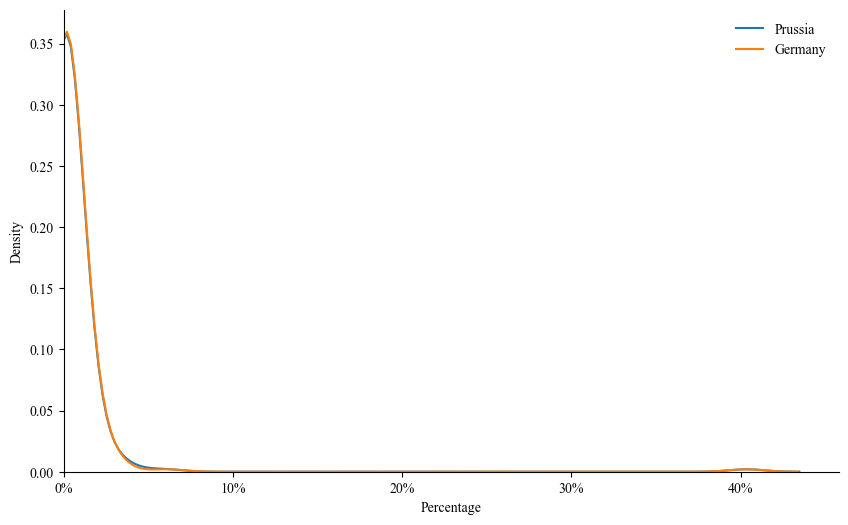

In [55]:
# Setting the font
plt.rcParams['font.family'] = 'Times New Roman'

# Creating KDE plots
plt.figure(figsize=(10, 6))
sns.kdeplot(df_KST['s_Prussia'], label='Prussia', bw_adjust=1)
sns.kdeplot(df_KST['s_GER'], label='Germany', bw_adjust=1)

# Removing the right and top spines
sns.despine()

# Additional plot settings
#plt.title('KDE Plot of the Distribution of the two ')
plt.xlabel('Percentage')
plt.ylabel('Density')
plt.legend(frameon = False)
plt.xlim(0, None)

# Set the x-axis to display percentages
ax = plt.gca()
vals = ax.get_xticks()
ax.set_xticklabels(['{:.0f}%'.format(x) for x in vals])

# Show plot
plt.show()

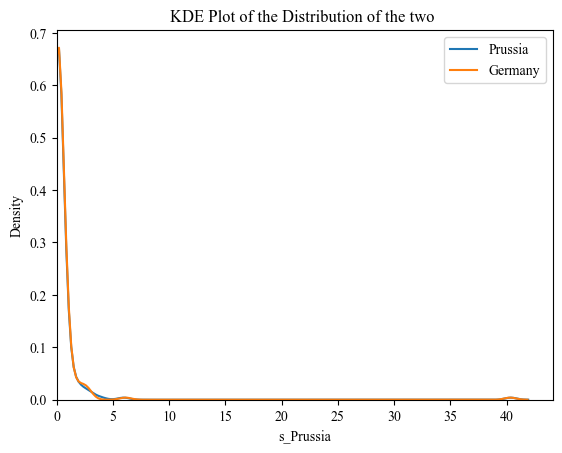

In [56]:
plt.rcParams['font.family'] = 'Times New Roman'
# Create KDE plots
sns.kdeplot(df_KST['s_Prussia'], label='Prussia', bw_adjust=0.5)
sns.kdeplot(df_KST['s_GER'], label='Germany', bw_adjust=0.5)

# Additional plot settings
plt.title('KDE Plot of the Distribution of the two ')
#plt.xlabel('log-Value')
plt.ylabel('Density')
plt.legend()
plt.xlim(0, None)
#plt.xscale('log')

# Show plot
plt.show()

In [57]:
from scipy.stats import ks_2samp


# Perform Kolmogorov-Smirnov Test
ks_statistic, p_value = ks_2samp(df_KST["s_Prussia"], df_KST["s_GER"])

# Print Results
print(f"K-S Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

# Interpretation of Results
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis: The state and national distributions are significantly different.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to conclude that the state and national distributions are significantly different.")


K-S Statistic: 0.06666666666666667
P-value: 0.7804669519924023
Fail to reject the null hypothesis: There is not enough evidence to conclude that the state and national distributions are significantly different.


In [58]:
chi2, p_value = chisquare(f_obs=df_KST["s_Prussia"], f_exp=df_KST["s_GER"])

# Print Results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p_value}")

# Interpretation of Results
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis: The state and national proportions are significantly different.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to conclude that the state and national proportions are significantly different.")

Chi-Square Statistic: 3.6915944480253753
P-value: 1.0
Fail to reject the null hypothesis: There is not enough evidence to conclude that the state and national proportions are significantly different.


# Tests

In [ ]:
df_Prussia = merged_df[
    (merged_df["Letter"] == "A") & 
    (merged_df["Number"].isin(["1", "4"]))
]
sum_agri = df_agri["d_Hauptberuf"].sum()
print(sum_agri)

In [ ]:
grouped_df = merged_df.groupby('occupation')['d_Hauptberuf'].sum().reset_index()
grouped_df.rename(columns={"d_Hauptberuf": "Prussia_Hauptberuf"}, inplace=True)
grouped_df

In [ ]:
# List of German Empire

Summe_Berufsgruppen = [1905987, #Bau
                       650897, #Gast u. Schankwirtschaft
                       1692069, #Bekleidung u. Reinigung
                       963278,
                       158776,
                       1186099,
                       24805,
                       125980,
                       1739910,
                       787754, 
                       714520, 
                       37111, 
                       1026288, 
                       9732472, 
                       75879, 
                       907048, 
                       1127516, 
                       426206, 
                       197903, 
                       1057243, 
                       60531]

# Verarbeitung von Metall und Eisenverarbeitung in den preussischen Daten müssen gemerged werden
# Häusliche DIenstleistungen müssen raus
# Torfgraeberei muss raus
# Unbestimmte_Fabrikaten_Arbeiter muss raus
# merge land und Wasserverkehr


grouped_df.drop(23, axis=0, inplace=True)
grouped_df.drop(22, axis=0, inplace=True)
grouped_df.drop(10, axis=0, inplace=True)
grouped_df.drop(20, axis=0, inplace=True)

grouped_df.at[5, "Prussia_Hauptberuf"] += grouped_df.at[24, "Prussia_Hauptberuf"]
grouped_df.drop(24, axis=0, inplace=True)

grouped_df.at[13, "Prussia_Hauptberuf"] += grouped_df.at[26, "Prussia_Hauptberuf"]
grouped_df.drop(26, axis=0, inplace=True)

In [ ]:
grouped_df['Germany_Hauptberuf'] = Summe_Berufsgruppen

# Make new columns with relative values
Prussia_sum = grouped_df['Prussia_Hauptberuf'].sum()
grouped_df['Prussia_frequency'] = grouped_df['Prussia_Hauptberuf'] / Prussia_sum

Germany_sum = grouped_df['Germany_Hauptberuf'].sum()
grouped_df['Germany_frequency'] = grouped_df['Germany_Hauptberuf'] / Germany_sum

grouped_df

In [ ]:
# Create KDE plots
sns.kdeplot(grouped_df['Prussia_frequency'], label='Prussia', bw_adjust=0.275)
sns.kdeplot(grouped_df['Germany_frequency'], label='Germany', bw_adjust=0.275)

# Additional plot settings
plt.title('KDE Plot of the Distribution of the two ')
plt.xlabel('log-Value')
plt.ylabel('Density')
plt.legend()
plt.xlim(0, None)
#plt.xscale('log')

# Show plot
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style to mimic The Economist
sns.set_style("white")
plt.style.use('fast')  # This makes the plot elements larger (suitable for presentations)
plt.rcParams['font.family'] = 'Times New Roman'  # Set font to Times New Roman

# Get the number of rows in your DataFrame for the number of bins
num_bins = len(grouped_df)

# Create KDE plots
sns.kdeplot(grouped_df['Prussia_frequency'], label='Prussia', bw_adjust=0.275)
sns.kdeplot(grouped_df['Germany_frequency'], label='Germany', bw_adjust=0.275)

# Create histograms using the same data, making bins equal to the number of rows in the DataFrame
#sns.histplot(grouped_df['Prussia_frequency'], bins=num_bins, kde=False, color='blue', alpha=0.2)
#sns.histplot(grouped_df['Germany_frequency'], bins=num_bins, kde=False, color='orange', alpha=0.2)

# Additional plot settings
plt.title('KDE Plot of the Distribution of the Two Groups')
plt.xlabel('log-Value')
plt.ylabel('Density')
plt.legend()

# Uncomment the next line if you want to set the x-axis limit starting from 0
plt.xlim(0, None)

# Set x-axis to log scale

# Show plot
plt.show()


Chi-Square test

In [ ]:
chi2, p_value = chisquare(f_obs=grouped_df["Prussia_frequency"], f_exp=grouped_df["Germany_frequency"])

# Print Results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p_value}")

# Interpretation of Results
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis: The state and national proportions are significantly different.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to conclude that the state and national proportions are significantly different.")

Kolmogorov-Smirnov Test

In [ ]:
import pandas as pd
from scipy.stats import ks_2samp


# Perform Kolmogorov-Smirnov Test
ks_statistic, p_value = ks_2samp(grouped_df["Prussia_frequency"], grouped_df["Germany_frequency"])

# Print Results
print(f"K-S Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

# Interpretation of Results
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis: The state and national distributions are significantly different.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to conclude that the state and national distributions are significantly different.")
